In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x_data = np.linspace(0, 10, 1_000_000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
# y = mx + b

# b = 5

y_true = 0.5 * x_data + 5 + noise
y_true

array([ 4.7127084 ,  4.18630303,  5.54375862, ..., 10.28932802,
        8.4736179 ,  9.6257197 ])

In [5]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

y_df = pd.DataFrame(data=y_true, columns=['Y'])

my_data = pd.concat([x_df, y_df], axis=1)

my_data.head()

,X Data,Y
0,0.00000,4.712708
1,0.00001,4.186303
2,0.00002,5.543759
3,0.00003,4.848968
4,0.00004,5.351425


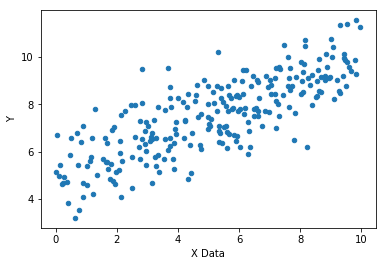

In [6]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [7]:
batch_size = 10

In [8]:
m = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())

In [9]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [10]:
y_model = m * xph + b

In [11]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [13]:
init = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 2000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed_dict = {
            xph: x_data[rand_ind],
            yph: y_true[rand_ind]
        }
        
        sess.run(train, feed_dict)
    
    m_model, b_model = sess.run([m, b])
    print(m_model, b_model)

0.45925155 4.946662


In [15]:
y_hat = x_data * m_model + b_model

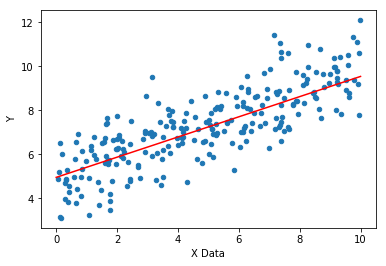

In [16]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')